# Task 1

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load data
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display first few rows
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

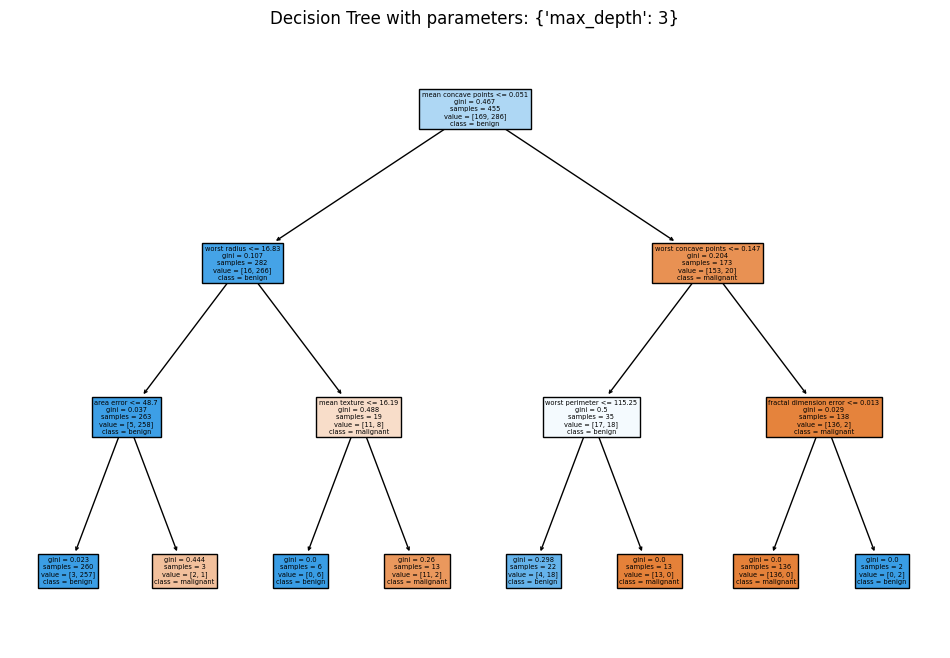

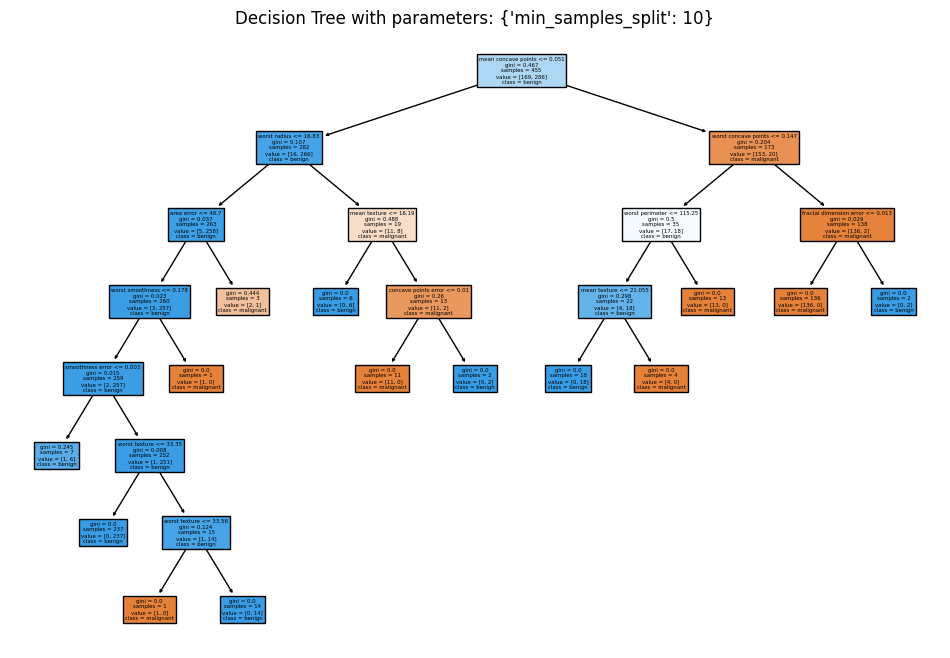

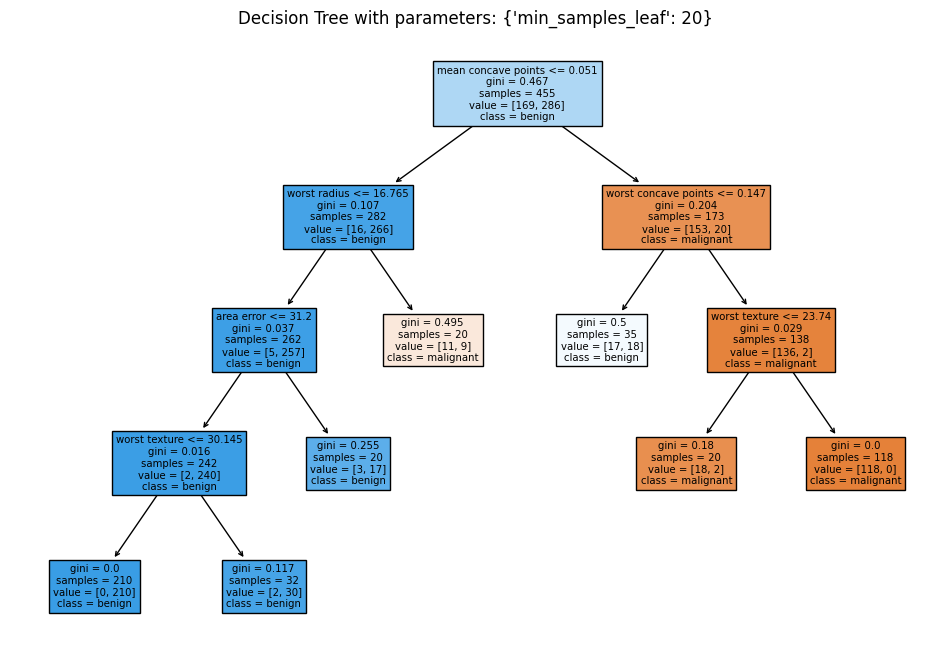

In [4]:
# 1

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['target']), df['target'], test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Define parameter settings to test
param_settings = [
    {'max_depth': 3},
    {'min_samples_split': 10},
    {'min_samples_leaf': 20}
]

# Train and visualize trees with different settings
for params in param_settings:
    clf = DecisionTreeClassifier(random_state=42, **params)
    clf.fit(X_train, y_train)

    plt.figure(figsize=(12, 8))
    plot_tree(clf, feature_names=list(data.feature_names), class_names=list(data.target_names), filled=True)
    plt.title(f"Decision Tree with parameters: {params}")
    plt.show()



Sensitivity Analysis is a technique that systematically varies input variables to understand how a model's output changes.

https://salib.readthedocs.io/en/latest/user_guide/basics.html#what-is-sensitivity-analysis

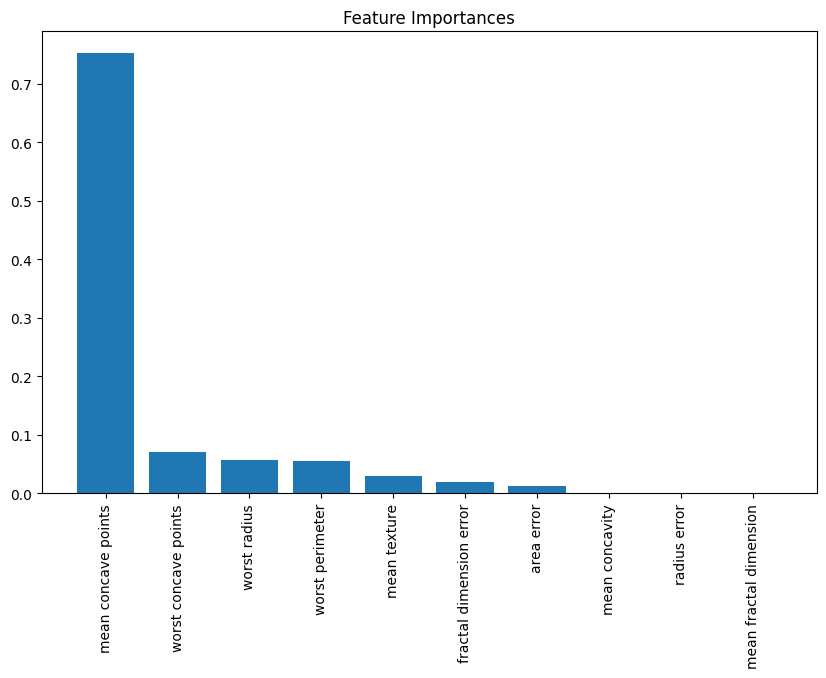

Top 2 features: ['mean concave points', 'worst concave points']


In [5]:
# 2

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Extract feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(10), importances[indices[:10]], align='center')
plt.xticks(range(10), X.columns[indices[:10]], rotation=90)
plt.title("Feature Importances")
plt.show()

# Top two influential features
top_features = X.columns[indices[:2]]
print(f"Top 2 features: {top_features.tolist()}")


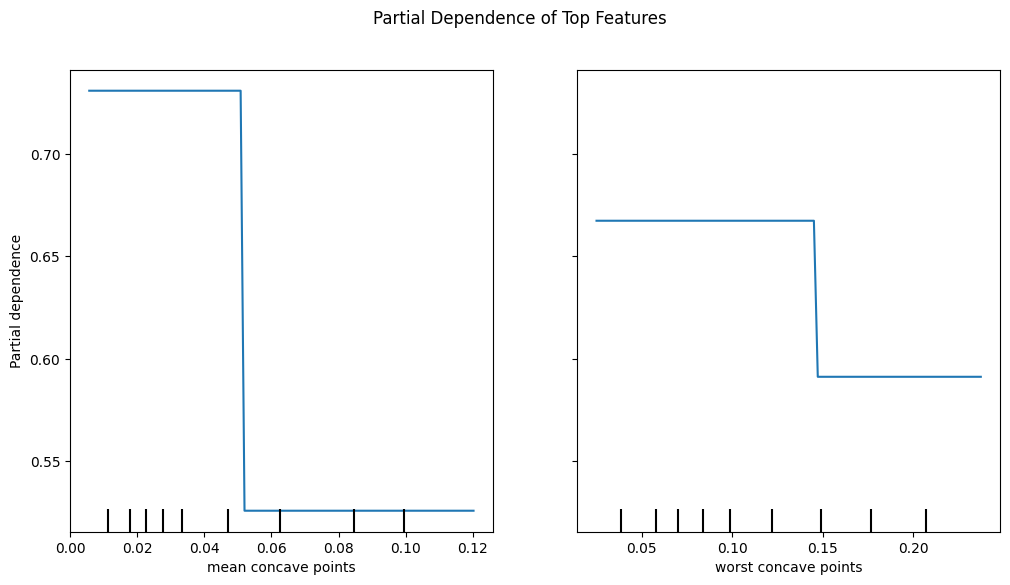

In [6]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

# Analyze the impact of the top 2 features
features_to_analyze = [indices[0], indices[1]]

# Generate and plot partial dependence plots
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(clf, X_train, features_to_analyze, ax=ax)
plt.suptitle("Partial Dependence of Top Features")
plt.show()


# Task 2

In [7]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, f1_score
import numpy as np

# Load dataset
X = data.data
y = data.target

# Define stratified k-fold cross-validation with 5, 10, and 15 folds
folds = [5, 10, 15]
metrics = {'accuracy': accuracy_score, 'precision': precision_score, 'f1_score': f1_score}

# Initialize models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Function to evaluate models
def evaluate_model(model, X, y, folds):
    results = {metric: [] for metric in metrics}
    for k in folds:
        skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
        for train_idx, test_idx in skf.split(X, y):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            for metric_name, metric_func in metrics.items():
                results[metric_name].append(metric_func(y_test, y_pred))

        print(f"\n{k}-Fold CV Results for {type(model).__name__}:")
        for metric_name in results:
            print(f"{metric_name}: {np.mean(results[metric_name]):.4f}")

# Evaluate Random Forest
evaluate_model(rf_model, X, y, folds)

# Evaluate XGBoost
evaluate_model(xgb_model, X, y, folds)



5-Fold CV Results for RandomForestClassifier:
accuracy: 0.9561
precision: 0.9651
f1_score: 0.9651

10-Fold CV Results for RandomForestClassifier:
accuracy: 0.9561
precision: 0.9635
f1_score: 0.9653

15-Fold CV Results for RandomForestClassifier:
accuracy: 0.9570
precision: 0.9631
f1_score: 0.9660

5-Fold CV Results for XGBClassifier:
accuracy: 0.9560
precision: 0.9628
f1_score: 0.9653

10-Fold CV Results for XGBClassifier:
accuracy: 0.9631
precision: 0.9699
f1_score: 0.9707

15-Fold CV Results for XGBClassifier:
accuracy: 0.9675
precision: 0.9706
f1_score: 0.9743


## 1. Behavior of Each Algorithm Under the Metrics

### Accuracy:
RF consistent across different folds, XGBoost shows slight improvement, increasing with more folds from 0.9506 to 0.9675. XGBoost better generalization as number of folds increases.

###Precision:
RF stable between 0.961 to 0.965, positive predictions are consistently accurate. XGBoost increasing from 0.9628 to 0.970, indicating it is better at minimizing false positivies in higher folds.

###F1-Score:
RF consistent range from 0.9651 to 0.9660, consistent balance between recall and precision. XGBoost shows improvement from 0.9653 to 0.9743, showing superior balance between recall and precision as the number of folds increases.

## 2. Does the Performance Ranking Change Based on the Metric Used? Why?
Yes, the performance does change based on the metric used. For the 5-fold, RF performs better in accuracy and precision. For 10-fold and 15-fold, XGBoost performs better in F1-score and precision. The ranking changes because each metric emphasizes different aspects of the model's performance: XGBoost appears to be superior in terms of precision and F1-score, which indicates better handling of false positives and improved balance, whereas RF provides more consistent accuracy across different folds.

# Task 3

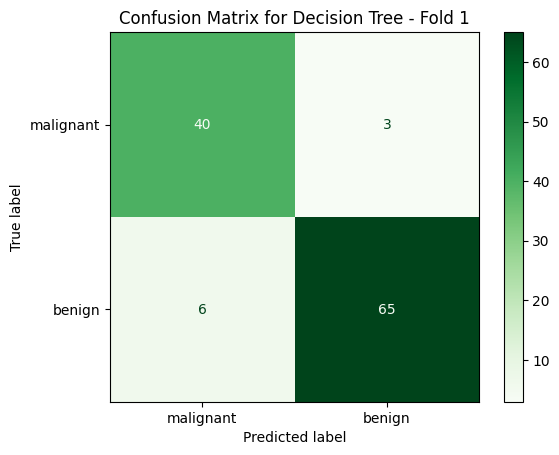

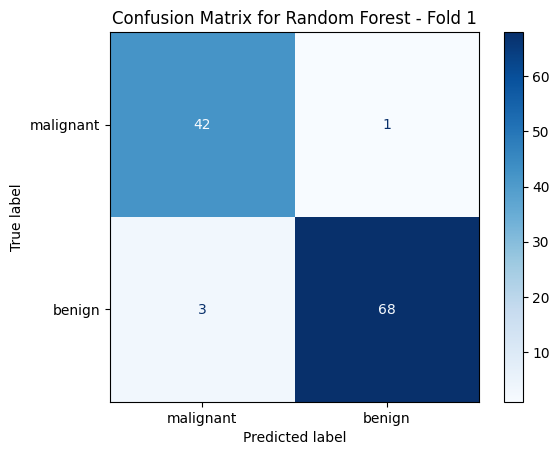

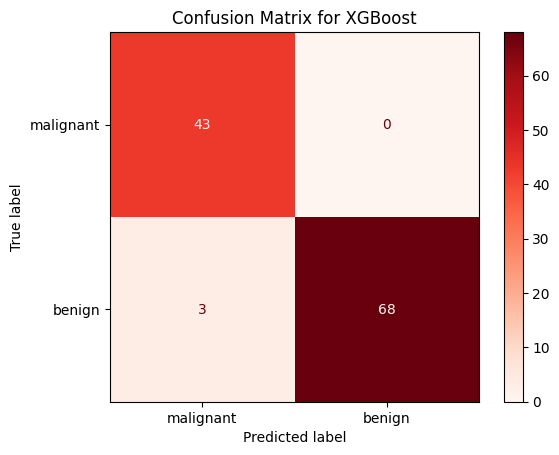

In [8]:
# 1

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Choose first fold
selected_fold = 1
for fold_idx, (train_index, test_index) in enumerate(skf.split(X, y), start=1):
    if fold_idx == selected_fold:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        break

# Train and evaluate Decision Tree
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# Plot Decision Tree confusion matrix
cm_dt = confusion_matrix(y_test, dt_preds)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=data.target_names)
disp_dt.plot(cmap='Greens')
plt.title(f"Confusion Matrix for Decision Tree - Fold {selected_fold}")
plt.show()

# Train and predict with Random Forest
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Generate and plot confusion matrix
cm_rf = confusion_matrix(y_test, rf_preds)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=data.target_names)
disp_rf.plot(cmap='Blues')
plt.title(f"Confusion Matrix for Random Forest - Fold {selected_fold}")
plt.show()

# Repeat for XGBoost
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

cm_xgb = confusion_matrix(y_test, xgb_preds)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=data.target_names)
disp_xgb.plot(cmap='Reds')
plt.title("Confusion Matrix for XGBoost")
plt.show()


In [9]:
# 2

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from scipy.stats import ttest_rel
import numpy as np

# Initialize StratifiedKFold with 5 splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store accuracy scores
rf_accuracies = []
xgb_accuracies = []
dt_accuracies = []

# Perform manual cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train Decision Tree Classifier
    dt_model.fit(X_train, y_train)
    dt_preds = dt_model.predict(X_test)
    dt_accuracies.append(accuracy_score(y_test, dt_preds))

    # Train Random Forest
    rf_model.fit(X_train, y_train)
    rf_preds = rf_model.predict(X_test)
    rf_accuracies.append(accuracy_score(y_test, rf_preds))

    # Train XGBoost
    xgb_model.fit(X_train, y_train)
    xgb_preds = xgb_model.predict(X_test)
    xgb_accuracies.append(accuracy_score(y_test, xgb_preds))

# Convert accuracy lists to numpy arrays
rf_accuracies = np.array(rf_accuracies)
xgb_accuracies = np.array(xgb_accuracies)
dt_accuracies = np.array(dt_accuracies)

# Perform paired t-test
t_stat_1, p_value_1 = ttest_rel(rf_accuracies, xgb_accuracies)
t_stat_2, p_value_2 = ttest_rel(rf_accuracies, dt_accuracies)
t_stat_3, p_value_3 = ttest_rel(xgb_accuracies, dt_accuracies)


print(f"Paired t-test results for RF vs XGB: t-statistic = {t_stat_1:.4f}, p-value = {p_value_1:.4f}")

if p_value_1 < 0.05:
    print("RF and XGBoost are significantly different.")
else:
    print("RF and XGBoost are not significantly different.")

print(f"Paired t-test results for RF vs DT: t-statistic = {t_stat_2:.4f}, p-value = {p_value_2:.4f}")

if p_value_2 < 0.05:
    print("RF and DT are significantly different.")
else:
    print("RF and DT are not significantly different.")

print(f"Paired t-test results for DT vs XGB: t-statistic = {t_stat_3}, p-value = {p_value_3:.4f}")

if p_value_3 < 0.05:
    print("DT and XGBoost are significantly different.")
else:
    print("DT and XGBoost are not significantly different.")

Paired t-test results for RF vs XGB: t-statistic = 0.0068, p-value = 0.9949
RF and XGBoost are not significantly different.
Paired t-test results for RF vs DT: t-statistic = 3.8863, p-value = 0.0177
RF and DT are significantly different.
Paired t-test results for DT vs XGB: t-statistic = 3.5021460388369854, p-value = 0.0248
DT and XGBoost are significantly different.


## Trade-off Between Bias and Variance for Each Model

###1. Decision Tree
The Decision Tree classifier has high bias and high variance, often underfitting while being prone to overfitting when deep. It struggles to capture complex patterns, resulting in poor generalization. The statistical tests showed significant differences compared to Random Forest and XGBoost (p-values of 0.0177 and 0.0248), confirming its weaker performance. Despite being easy to interpret and fast to train, its lack of robustness limits its effectiveness for complex tasks.

###2. Random Forest
Random Forest balances the bias-variance trade-off by averaging multiple decision trees, reducing bias while keeping variance moderate. It provides strong generalization and stability, as indicated by the insignificant performance difference with XGBoost (p-value = 0.9949). This makes it a reliable choice with consistent accuracy and reduced overfitting, suitable for applications requiring both performance and interpretability.

###3. XGBoost
XGBoost achieves low bias and controlled variance through iterative learning and regularization. While boosting methods can overfit, XGBoost’s optimizations maintain generalizability. Its performance was statistically similar to Random Forest, showing its effectiveness for complex tasks.

# Task 4

In [10]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

# Display the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'subsample': 0.8}
Best Accuracy: 0.9736376339077782


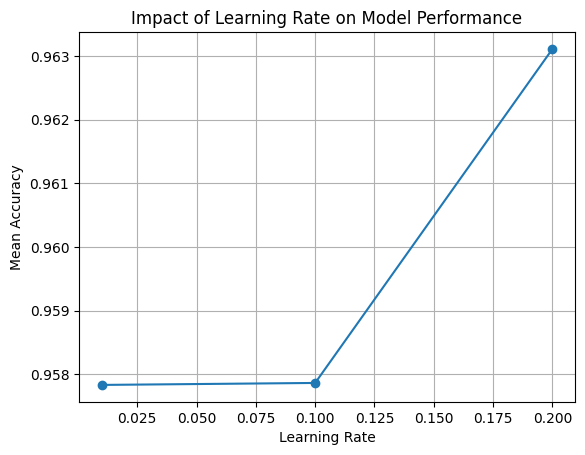

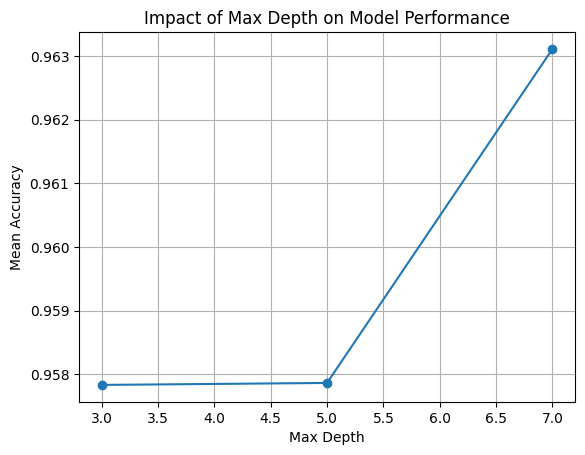

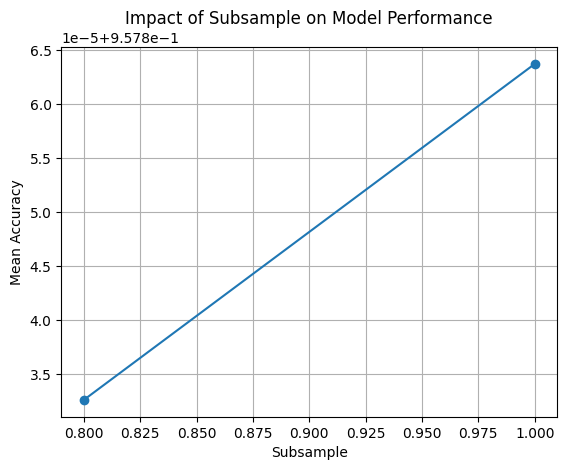

In [13]:
import numpy as np
import matplotlib.pyplot as plt

results = grid_search.cv_results_

# Extract mean test scores from GridSearchCV results
mean_test_scores = results['mean_test_score']

# Get the unique learning rates
learning_rates = np.unique(grid_search.cv_results_['param_learning_rate'].data)

# Plot learning rate vs accuracy
plt.plot(learning_rates, mean_test_scores[:len(learning_rates)], marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Accuracy')
plt.title('Impact of Learning Rate on Model Performance')
plt.grid(True)
plt.show()

# Get the unique max depths
max_depths = np.unique(grid_search.cv_results_['param_max_depth'].data)

# Extract mean test scores corresponding to different max depths
mean_test_scores_depth = [results['mean_test_score'][i] for i in range(len(results['param_max_depth']))]

# Plot max depth vs accuracy
plt.plot(max_depths, mean_test_scores_depth[:len(max_depths)], marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Mean Accuracy')
plt.title('Impact of Max Depth on Model Performance')
plt.grid(True)
plt.show()

# Get the unique subsample values
subsamples = np.unique(grid_search.cv_results_['param_subsample'].data)

# Extract mean test scores corresponding to different subsamples
mean_test_scores_subsample = [results['mean_test_score'][i] for i in range(len(results['param_subsample']))]

# Plot subsample vs accuracy
plt.plot(subsamples, mean_test_scores_subsample[:len(subsamples)], marker='o')
plt.xlabel('Subsample')
plt.ylabel('Mean Accuracy')
plt.title('Impact of Subsample on Model Performance')
plt.grid(True)
plt.show()
